Convert several rasters with data of Lake Marken (NL) to one file with the Ugrid NetCDF format that can be used by D-Eco Impact

This data orginates from an earlier study done with the software HABITAT (Deltares, end-of-life) and has been downsized for this example (factor 10). This example showcases how D-Eco Impact can fill its required functionality.

In [2]:
#load required libraries and prepare logging
import os
import xarray as xr
import xugrid as xu
import logging

#for plotting
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx

logger = logging.getLogger(__name__)

import sys  
sys.path.insert(1, '../library')
from DEcoImpact_conv_func import DEIModel

In [3]:
#configuration
input_folder = r'..\tests\rawdata\lakemarken_rasters'

ds_in_ugrid = r'..\tests\testdata\ugrid_netcdf\small_subset_FM-VZM_0000_map.nc'   #input data ugrid
ds_in_vector  = r'..\tests\rawdata\lakevolkerak_rasters\selection_vector.gpkg' #input data vector

ds_out = r'input_DEI_small_subset_with_vector_FM-VZM_0000_map.nc' # output location of file that can be loaded by D-Eco Impact

crs_code = "epsg:28992"                            # coordinate system applicable to file
crs_code_vector = "epsg:4326"                      # coordinate system applicable to file


In [4]:
#initialize
DEI = DEIModel()
cwd = os.getcwd()
DEI.set_root(root = cwd)

#read Netcdf
region_dict = {"ugrid": ds_in_ugrid}
DEI.setup_ugrid(region = region_dict, crs = crs_code)

#add the other grids when they are same in resolution
DEI.add_vector_data(fn = ds_in_vector, crs = crs_code_vector, datacolumns = "selection", translation="larger")

#check results
print("Categories:")
for cat in DEI._categories["selection"]:
    print(cat)

print(DEI._mesh2d)

#export result
DEI.write_mesh(fn_temp = "example_output_data/temporary_file.nc", fn_ecoimpact = "example_output_data/"+ds_out)

print("Done.")

Categories:
[0, 'land']
[1, 'nan']
[2, 'transboundary']
[3, 'water']
<xarray.Dataset> Size: 13MB
Dimensions:                (mesh2d_nNodes: 71, mesh2d_nEdges: 171,
                            mesh2d_nFaces: 101, mesh2d_nMax_face_nodes: 4,
                            time: 230, mesh2d_nLayers: 22)
Coordinates:
    mesh2d_node_x          (mesh2d_nNodes) float64 568B 7.54e+04 ... 7.595e+04
    mesh2d_node_y          (mesh2d_nNodes) float64 568B 4.06e+05 ... 4.054e+05
    mesh2d_edge_x          (mesh2d_nEdges) float64 1kB ...
    mesh2d_edge_y          (mesh2d_nEdges) float64 1kB ...
    mesh2d_face_x          (mesh2d_nFaces) float64 808B ...
    mesh2d_face_y          (mesh2d_nFaces) float64 808B ...
  * time                   (time) datetime64[ns] 2kB 2010-10-01 ... 2016-12-31
  * mesh2d_nNodes          (mesh2d_nNodes) int64 568B 0 1 2 3 4 ... 67 68 69 70
  * mesh2d_nFaces          (mesh2d_nFaces) int64 808B 0 1 2 3 4 ... 97 98 99 100
  * mesh2d_nEdges          (mesh2d_nEdges) int64 1kB 

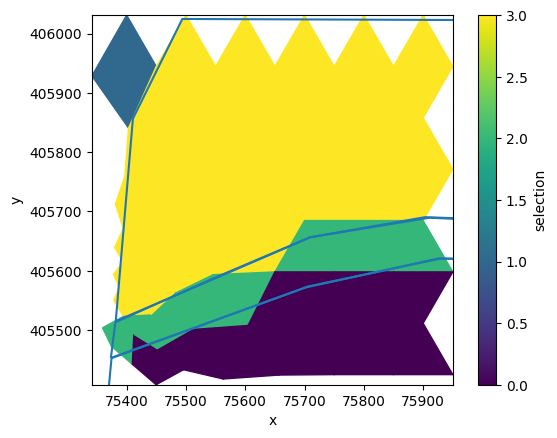

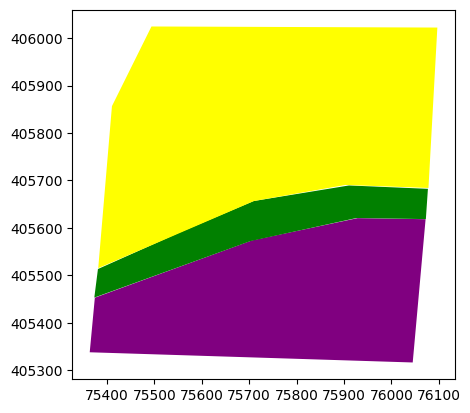

In [ ]:
#visualize results and compare if matching worked well
vector = gpd.read_file(ds_in_vector)
vector = vector.to_crs(crs_code)

cmap_custom = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","green","yellow"])

with xu.open_mfdataset("example_output_data/"+ds_out) as result:
    ax = plt.subplot()
    result["selection"].ugrid.plot(ax = ax)
    vector.boundary.plot(ax = ax)
    vector.plot("selection", cmap = cmap_custom)